# **Customers Segmentation**

To divide the mall target market into approachable groups and create subsets based on demographics and behavioral criteria, a segmentation analysis can be performed. This involves identifying distinct groups within the market based on common characteristics such as age, income, shopping behavior, and lifestyle.

One approach to segmentation is to use a combination of demographic and behavioral criteria to create subsets that better reflect the needs and preferences of the target market. For example, groups can be created based on age range, income level, shopping frequency, and preferred shopping channels such as online or in-store.

Once the subsets have been created, the target marketing activities can be tailored to each group's specific needs and preferences. For example, younger consumers may prefer social media and influencer marketing, while older consumers may respond better to traditional advertising channels such as print and television.

By understanding the characteristics and preferences of each group, the marketing activities can be optimized to effectively reach and engage the target market. This can help to increase customer loyalty, drive sales, and improve overall marketing effectiveness.

Overall, segmentation analysis can be a powerful tool for understanding the target market and creating approachable groups based on demographics and behavioral criteria. By tailoring marketing activities to each group, businesses can effectively reach and engage their target audience and achieve their marketing objectives.

* **Problem Statement:** Understant the target customers for the marketing team to plan a strategy.
* **Context:** Your boss wants you to identify the most important shopping groups based on income,age and the mall shoping score. He wants the ideal number of groups with a label for each.

## **About The Dataset**

**Data exlanation provided:**

* **CustomerID:** The identity number of the customer.
* **Gender:** Gender of the customer.
* **Age:** Age of the customer.
* **Annual Income (k):** Annual income of the customer in mil.

**Objective:**

* Divide mall target market into approachable groups. Create subsets of a market based on demograpics behavioral criteria to better understand the target marketing acitivities.

## **Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# LOADIDNG THE DATA
df =  pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## **Understanding The Data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In the case of Annual Income, because the mean and median are very similar, it is most likely that the data are normally distributed. 

In [6]:
df.describe(include = "O").transpose()

,count,unique,top,freq
Gender,200,2,Female,112


As for the gender of the customers, most of them are women by a small difference.

## **Univariate Analysis**

In [7]:
df = df.rename(columns = {"Annual Income (k$)":"Annual Income", "Spending Score (1-100)":"Spending Score"})

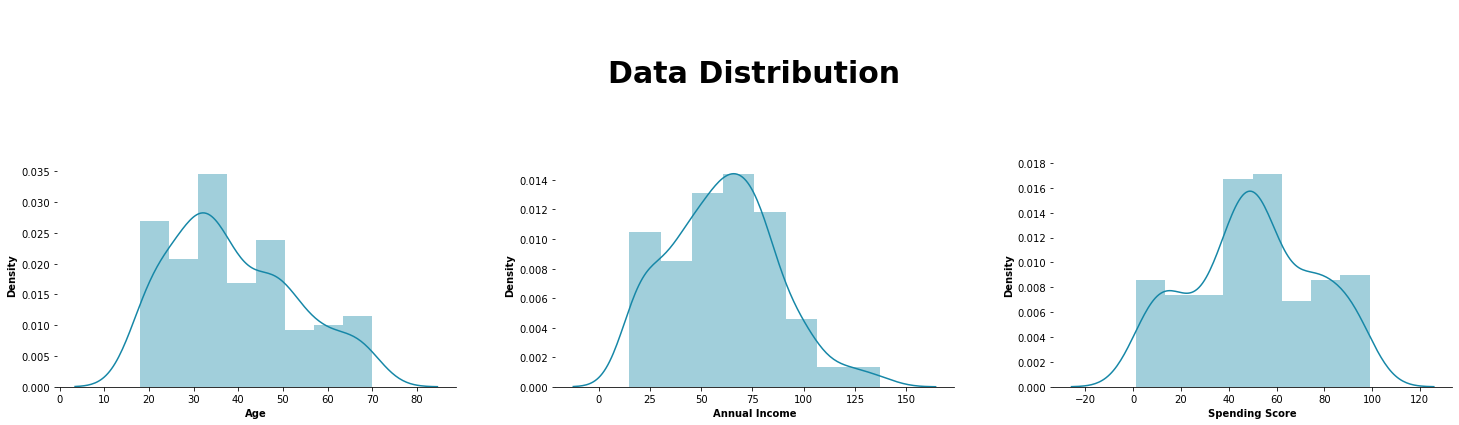

In [8]:
#POSITION
fig = plt.figure(figsize = (25,7))
gs = fig.add_gridspec(nrows = 2, ncols = 3, wspace = .25, hspace = -.3)
ax0 = fig.add_subplot(gs[0,1])
ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[1,1])
ax3 = fig.add_subplot(gs[1,2])

# Background
background = "white"
fig.patch.set_facecolor(background)
ax0.set_facecolor(background)
ax1.set_facecolor(background)
ax2.set_facecolor(background)
ax3.set_facecolor(background)

# TITLE 
ax0.text(0.5 ,0.7,
        "Data Distribution",
        fontsize = 30,
        fontweight = "bold",
        horizontalalignment = "center",
        verticalalignment = "center")
ax0.set(xticks = [], yticks = [])
ax0.tick_params(left = False, right = False)
ax0.spines[["top", "right", "bottom", "left"]].set_visible(False)

# AGE
sns.distplot(df["Age"], bins = 8, kde = True, color ="#1687A7", ax = ax1)
ax1.set_ylabel("Density", fontweight = "bold")
ax1.set_xlabel("Age", fontweight = "bold")

# ANNUAL INCOME
sns.distplot(df["Annual Income"], bins = 8, kde = True, color ="#1687A7", ax = ax2)
ax2.set_ylabel("Density", fontweight = "bold")
ax2.set_xlabel("Annual Income", fontweight = "bold")

# SPENDING SCORE
sns.distplot(df["Spending Score"], bins = 8, kde = True, color ="#1687A7", ax = ax3)
ax3.set_ylabel("Density", fontweight = "bold")
ax3.set_xlabel("Spending Score", fontweight = "bold")

for i in ["top", "right", "left"]:
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)

plt.show()

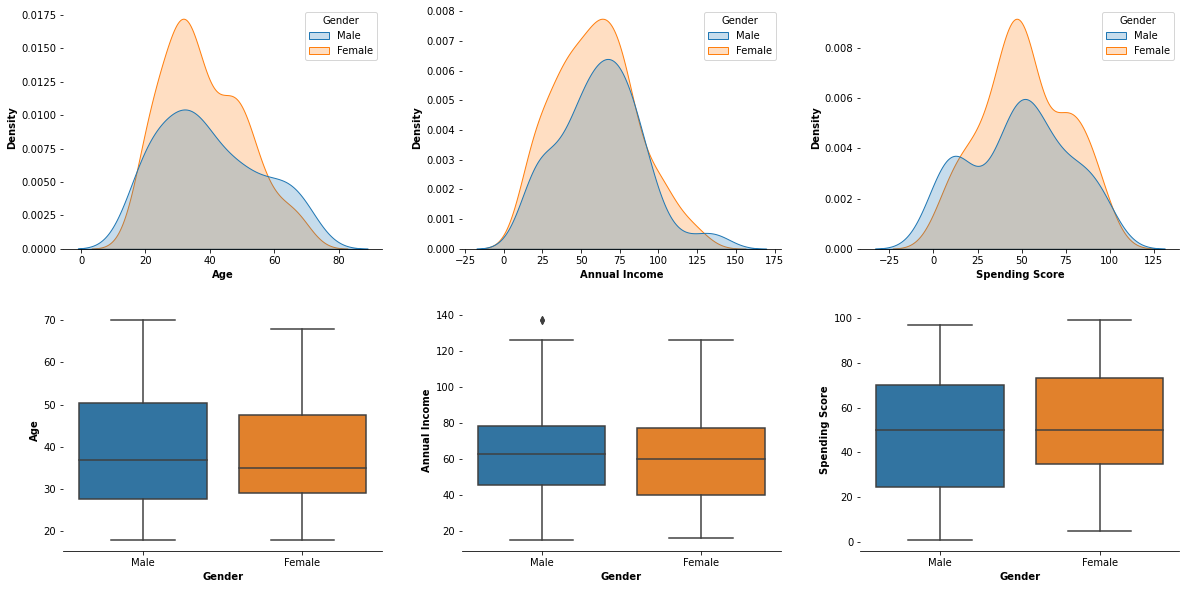

In [9]:
#POSITION
fig = plt.figure(figsize = (20,10))
gs = fig.add_gridspec(nrows = 2, ncols = 3, wspace = .25, hspace = .25)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[1,0])
ax5 = fig.add_subplot(gs[1,1])
ax6 = fig.add_subplot(gs[1,2])


# Background
background = "white"
fig.patch.set_facecolor(background)
ax0.set_facecolor(background)
ax1.set_facecolor(background)
ax2.set_facecolor(background)
ax3.set_facecolor(background)

# AGE
sns.kdeplot(df["Age"], shade = True, hue = df["Gender"], ax = ax1)
ax1.set_ylabel("Density", fontweight = "bold")
ax1.set_xlabel("Age", fontweight = "bold")

sns.boxplot(data = df, x = "Gender", y = "Age", ax = ax4)
ax4.set_ylabel("Age", fontweight = "bold")
ax4.set_xlabel("Gender", fontweight = "bold")

# ANNUAL INCOME
sns.kdeplot(df["Annual Income"], shade = True, hue = df["Gender"], ax = ax2)
ax2.set_ylabel("Density", fontweight = "bold")
ax2.set_xlabel("Annual Income", fontweight = "bold")

sns.boxplot(data = df, x = "Gender", y = "Annual Income", ax = ax5)
ax5.set_ylabel("Annual Income", fontweight = "bold")
ax5.set_xlabel("Gender", fontweight = "bold")

# SPENDING SCORE
sns.kdeplot(df["Spending Score"], shade = True, hue = df["Gender"], ax = ax3)
ax3.set_ylabel("Density", fontweight = "bold")
ax3.set_xlabel("Spending Score", fontweight = "bold")

sns.boxplot(data = df, x = "Gender", y = "Spending Score", ax = ax6)
ax6.set_ylabel("Spending Score", fontweight = "bold")
ax6.set_xlabel("Gender", fontweight = "bold")


for i in ["top", "right", "left"]:
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)


plt.show()

## **Bivariate Analysis**

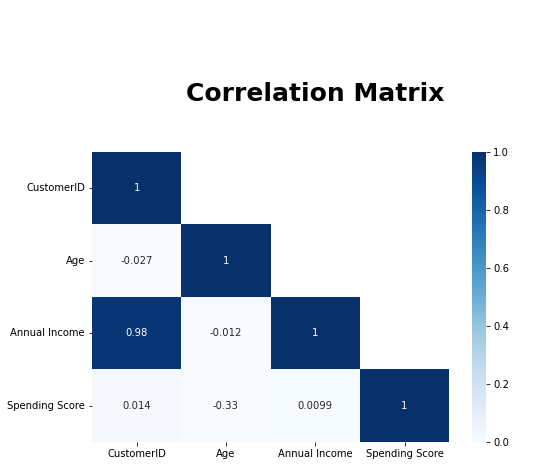

In [10]:
# VARIABLES
corr = df.corr()
mask = np.triu(np.ones_like(corr), k = 1)

# POSITION 
fig = plt.figure(figsize = (8,8))
gs = fig.add_gridspec(nrows = 2, ncols = 1, hspace = -.5, wspace = 0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])

# TITLE 1
ax0.text(0.5, 0.7,
        "Correlation Matrix",
        fontsize = 25,
        fontweight = "bold",
        verticalalignment = "center",
        horizontalalignment = "center")
ax0.set(xticks = [], yticks = [])
ax0.tick_params(left = False, right = False)

# CORRELATION MARIX
sns.heatmap(corr, annot = True, cmap = "Blues", vmin = 0, vmax = 1, ax = ax1, mask = mask)
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize = 10)
ax1.set_yticklabels(ax1.get_yticklabels(), fontsize = 10)

for i in ["top", "right", "bottom", "left"]:
    ax0.spines[i].set_visible(False)
    
plt.show()

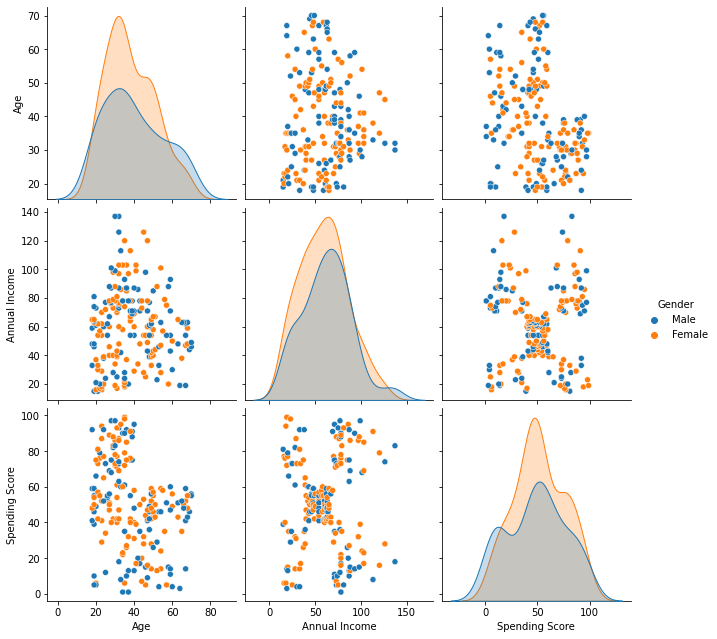

In [11]:
dfc = df.drop(columns = {"CustomerID"}, axis = 1)
sns.pairplot(dfc, hue = "Gender", size = 3)
plt.show()

If we pay attention to the Annual Income and Spending Score scatter plots, we will notice the existence of 5 possible clusters into which we can classify the mall's customers

## **Clustering**

To identify the most important shopping groups based on income, age, and the mall shopping score, clustering analysis can be performed on the dataset. The ideal number of groups and their corresponding labels can be determined by using a clustering algorithm and evaluating the results using various metrics such as the silhouette score, elbow method, and visual inspection of the resulting clusters.

The number of clusters that should be used will depend on the size and complexity of the dataset, as well as the desired level of granularity in the resulting groups. In general, it is recommended to start with a smaller number of clusters and then increase the number if necessary.

Once the optimal number of clusters has been determined, each group can be labeled based on its characteristics. For example, a group with high income, young age, and high mall shopping score could be labeled as "High Spenders" or "Trendsetters", while a group with low income, older age, and low mall shopping score could be labeled as "Budget Shoppers" or "Conservative Buyers".

Overall, the ideal number of shopping groups and their corresponding labels will depend on the specific characteristics of the dataset and the goals of the analysis. A careful evaluation of the results and consideration of the context can help to determine the best approach for clustering and labeling the groups.

### Univariate Clustering

In [12]:
from sklearn.cluster import KMeans

In [13]:
c1 = KMeans()
c1.fit(df[["Annual Income"]])
c1.labels_

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)

By default the number of clusters is defined as 8, which we will later adjust with the help of the elbow method which is used to find the right number of clusters. In the meantime we will add a new column to the DataFrame to identify to which cluster each customer belongs.

In [14]:
df["C1"] = c1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score,C1
0,1,Male,19,15,39,4
1,2,Male,21,15,81,4
2,3,Female,20,16,6,4
3,4,Female,23,16,77,4
4,5,Female,31,17,40,4


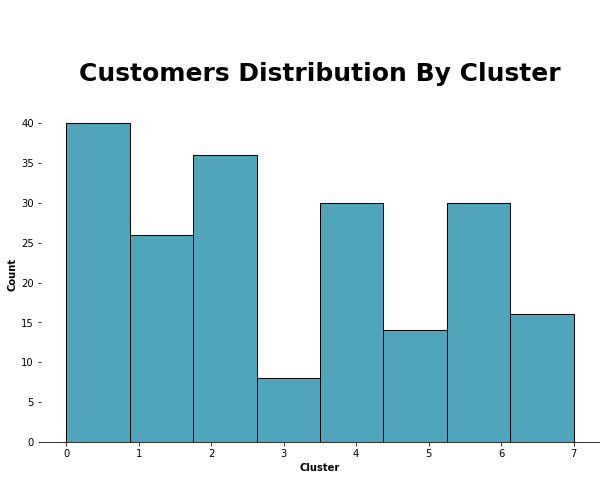

In [15]:
# POSITION
fig = plt.figure(figsize = (10,8))
gs = fig.add_gridspec(nrows = 2, ncols = 1, hspace = -.7)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])

# BACKGROUND
background = "white"
fig.patch.set_facecolor(background)
ax0.set_facecolor(background)
ax1.set_facecolor(background)

# TITLE 1
ax0.text(0.5 ,0.8,
        "Customers Distribution By Cluster",
        fontsize = 25,
        fontweight = "bold",
        horizontalalignment = "center",
        verticalalignment = "center")
ax0.set(xticks = [], yticks = [])
ax0.tick_params(left = False, right = False)
ax0.spines[["top", "right", "bottom", "left"]].set_visible(False)

# GENERAL RATING DISTRIBUTION+
sns.histplot(data = df, x = "C1", bins = 8, kde = False, color ="#1687A7", ax = ax1)
ax1.set_ylabel("Count", fontweight = "bold")
ax1.set_xlabel("Cluster", fontweight = "bold")
ax1.spines[["top", "right", "left"]].set_visible(False)

In [16]:
c1.inertia_

2885.501892551892

In [17]:
ins = []
for i in range(1,11):
    km = KMeans(n_clusters = i)
    km.fit(df[["Annual Income"]])
    ins.append(km.inertia_)
ins

[137277.2800000002,
 48660.88888888887,
 23517.33093093092,
 13278.112713472474,
 8481.49619047619,
 5081.484660267269,
 3931.9880952380995,
 2822.4996947496957,
 2189.2563714063713,
 1808.2204129204133]

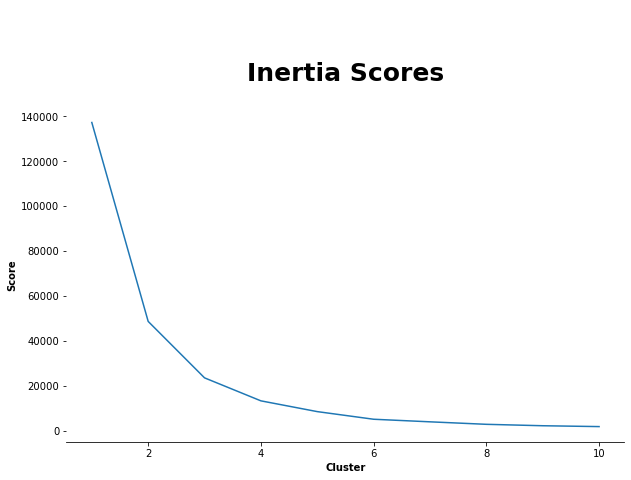

In [18]:
# POSITION
fig = plt.figure(figsize = (10,8))
gs = fig.add_gridspec(nrows = 2, ncols = 1, hspace = -.7)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])

# BACKGROUND
background = "white"
fig.patch.set_facecolor(background)
ax0.set_facecolor(background)
ax1.set_facecolor(background)

# TITLE 1
ax0.text(0.5 ,0.8,
        "Inertia Scores",
        fontsize = 25,
        fontweight = "bold",
        horizontalalignment = "center",
        verticalalignment = "center")
ax0.set(xticks = [], yticks = [])
ax0.tick_params(left = False, right = False)
ax0.spines[["top", "right", "bottom", "left"]].set_visible(False)

# GENERAL RATING DISTRIBUTION+
ax1.plot(range(1,11), ins)
ax1.set_ylabel("Score", fontweight = "bold")
ax1.set_xlabel("Cluster", fontweight = "bold")
ax1.spines[["top", "right", "left"]].set_visible(False)

In [19]:
c1 = KMeans(n_clusters = 3)
c1.fit(df[["Annual Income"]])
df["C1"] = c1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score,C1
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [20]:
df.groupby("C1")["Age", "Annual Income", "Spending Score"].mean().transpose()

C1,0,1,2
Age,39.184783,38.930556,37.833333
Annual Income,66.717391,33.027778,99.888889
Spending Score,50.054348,50.166667,50.638889


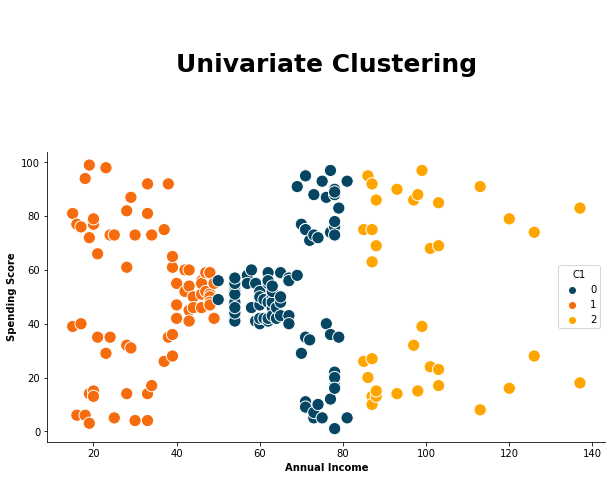

In [21]:
colors = ["#064663", "#F66B0E", "#FFA500"]

# POSITION
fig = plt.figure(figsize = (10,8))
gs = fig.add_gridspec(nrows = 2, ncols = 1, hspace = -.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])

# BACKGROUND
background = "white"
fig.patch.set_facecolor(background)
ax0.set_facecolor(background)
ax1.set_facecolor(background)

# TITLE 1
ax0.text(0.5 ,0.8,
        "Univariate Clustering",
        fontsize = 25,
        fontweight = "bold",
        horizontalalignment = "center",
        verticalalignment = "center")
ax0.set(xticks = [], yticks = [])
ax0.tick_params(left = False, right = False)
ax0.spines[["top", "right", "bottom", "left"]].set_visible(False)

# GENERAL RATING DISTRIBUTION+
sns.scatterplot(data = df, x = "Annual Income", y = "Spending Score", hue = "C1", s = 150, palette = colors , ax = ax1)
ax1.set_ylabel("Spending Score", fontweight = "bold")
ax1.set_xlabel("Annual Income", fontweight = "bold")
ax1.spines[["top", "right"]].set_visible(False)

### Bivariate Clustering

In [22]:
c2 = KMeans()
c2.fit(df[["Annual Income", "Spending Score"]])
c2.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 6, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 6, 3, 6, 6,
       4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 7, 5, 7, 5, 7, 5,
       7, 5], dtype=int32)

In [23]:
df["C2"] = c2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score,C1,C2
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,3
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,1,3
4,5,Female,31,17,40,1,4


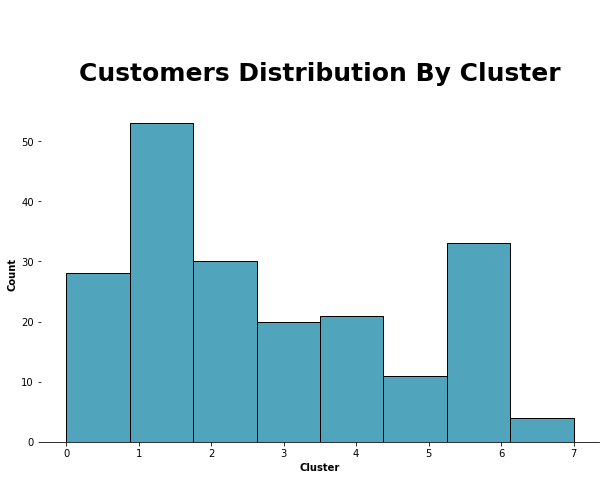

In [24]:
# POSITION
fig = plt.figure(figsize = (10,8))
gs = fig.add_gridspec(nrows = 2, ncols = 1, hspace = -.7)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])

# BACKGROUND
background = "white"
fig.patch.set_facecolor(background)
ax0.set_facecolor(background)
ax1.set_facecolor(background)

# TITLE 1
ax0.text(0.5 ,0.8,
        "Customers Distribution By Cluster",
        fontsize = 25,
        fontweight = "bold",
        horizontalalignment = "center",
        verticalalignment = "center")
ax0.set(xticks = [], yticks = [])
ax0.tick_params(left = False, right = False)
ax0.spines[["top", "right", "bottom", "left"]].set_visible(False)

# GENERAL RATING DISTRIBUTION+
sns.histplot(data = df, x = "C2", bins = 8, kde = False, color ="#1687A7", ax = ax1)
ax1.set_ylabel("Count", fontweight = "bold")
ax1.set_xlabel("Cluster", fontweight = "bold")
ax1.spines[["top", "right", "left"]].set_visible(False)

In [25]:
ins2 = []
for i in range(1,11):
    km2 = KMeans(n_clusters = i)
    km2.fit(df[["Annual Income", "Spending Score"]])
    ins2.append(km2.inertia_)
ins

[137277.2800000002,
 48660.88888888887,
 23517.33093093092,
 13278.112713472474,
 8481.49619047619,
 5081.484660267269,
 3931.9880952380995,
 2822.4996947496957,
 2189.2563714063713,
 1808.2204129204133]

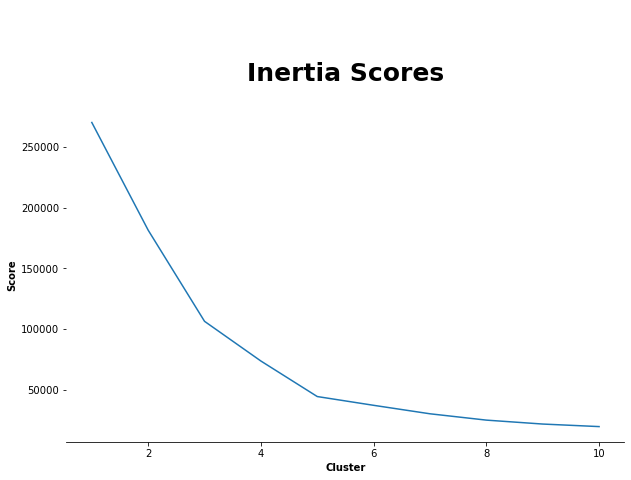

In [26]:
# POSITION
fig = plt.figure(figsize = (10,8))
gs = fig.add_gridspec(nrows = 2, ncols = 1, hspace = -.7)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])

# BACKGROUND
background = "white"
fig.patch.set_facecolor(background)
ax0.set_facecolor(background)
ax1.set_facecolor(background)

# TITLE 1
ax0.text(0.5 ,0.8,
        "Inertia Scores",
        fontsize = 25,
        fontweight = "bold",
        horizontalalignment = "center",
        verticalalignment = "center")
ax0.set(xticks = [], yticks = [])
ax0.tick_params(left = False, right = False)
ax0.spines[["top", "right", "bottom", "left"]].set_visible(False)

# GENERAL RATING DISTRIBUTION+
ax1.plot(range(1,11), ins2)
ax1.set_ylabel("Score", fontweight = "bold")
ax1.set_xlabel("Cluster", fontweight = "bold")
ax1.spines[["top", "right", "left"]].set_visible(False)

In [27]:
c2 = KMeans(n_clusters = 5)
c2.fit(df[["Annual Income", "Spending Score"]])
df["C2"] = c2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score,C1,C2
0,1,Male,19,15,39,1,1
1,2,Male,21,15,81,1,0
2,3,Female,20,16,6,1,1
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,1,1


In [28]:
df.groupby("C2")["Age", "Annual Income", "Spending Score"].mean().transpose()

C2,0,1,2,3,4
Age,25.272727,45.217391,32.692308,41.114286,42.716049
Annual Income,25.727273,26.304348,86.538462,88.200000,55.296296
Spending Score,79.363636,20.913043,82.128205,17.114286,49.518519


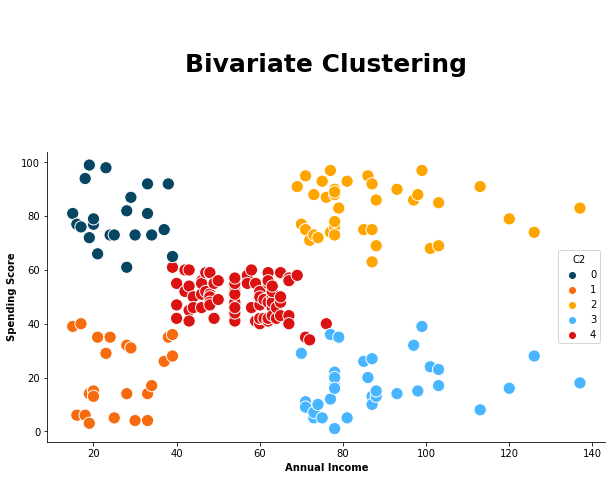

In [29]:
colors = ["#064663", "#F66B0E", "#FFA500", "#47B5FF", "#DA1212"]

# POSITION
fig = plt.figure(figsize = (10,8))
gs = fig.add_gridspec(nrows = 2, ncols = 1, hspace = -.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])

# BACKGROUND
background = "white"
fig.patch.set_facecolor(background)
ax0.set_facecolor(background)
ax1.set_facecolor(background)

# TITLE 1
ax0.text(0.5 ,0.8,
        "Bivariate Clustering",
        fontsize = 25,
        fontweight = "bold",
        horizontalalignment = "center",
        verticalalignment = "center")
ax0.set(xticks = [], yticks = [])
ax0.tick_params(left = False, right = False)
ax0.spines[["top", "right", "bottom", "left"]].set_visible(False)

# GENERAL RATING DISTRIBUTION+
sns.scatterplot(data = df, x = "Annual Income", y = "Spending Score", hue = "C2", s = 150, palette = colors , ax = ax1)
ax1.set_ylabel("Spending Score", fontweight = "bold")
ax1.set_xlabel("Annual Income", fontweight = "bold")
ax1.spines[["top", "right"]].set_visible(False)

In [30]:
pd.crosstab(df["C2"], df["Gender"], normalize = "index")

Gender,Female,Male
C2,,
0,0.590909,0.409091
1,0.608696,0.391304
2,0.538462,0.461538
3,0.457143,0.542857
4,0.592593,0.407407


In [31]:
df.groupby("C2")["Age", "Annual Income", "Spending Score"].mean()

,Age,Annual Income,Spending Score
C2,,,
0,25.272727,25.727273,79.363636
1,45.217391,26.304348,20.913043
2,32.692308,86.538462,82.128205
3,41.114286,88.200000,17.114286
4,42.716049,55.296296,49.518519


## **Conclusions**

**Target Cluster:**

* Target group would by Cluster 2. It seems that Cluster 2 consists of customers with higher spending scores and annual incomes, and a majority of them are women. To attract these customers, a targeted marketing campaign can be designed with popular items that are relevant to this cluster.

* The first step would be to identify the most popular products or services that are commonly purchased by Cluster 2 customers. This can be done by analyzing past sales data and customer feedback. Once the popular items are identified, the marketing campaign can be designed around these items.

* The campaign can be targeted towards women in Cluster 2 by using messaging and advertising that resonates with them. This can include using images and language that appeals to women, as well as highlighting the features and benefits of the popular items in a way that is relevant to this group. Social media platforms and email marketing can also be used to reach this target group.

* In addition to highlighting the popular items, the marketing campaign can also offer special discounts or promotions to Cluster 2 customers. This can help to incentivize them to make a purchase and increase customer loyalty.

* Overall, a targeted marketing campaign that focuses on popular items and appeals to the women in Cluster 2 can be an effective way to attract and retain customers in this group.

**Others:**

* Cluster 4 presents a promising chance to promote sales of popular items to its customers during events.